In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
import keras

Using TensorFlow backend.


In [2]:
all_df = pd.read_csv("train.csv")

In [3]:
all_df[:100]

,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure,suicide
0,male,22,s,soldier,v,L,adaptWellType,0,0,0,0,0,0,0,0,0,0,1
1,male,20,s,soldier,v,S,adaptWellType,0,0,0,0,0,0,0,1,0,0,1
2,male,20,s,soldier,c,S,generalType,0,1,1,0,0,1,0,1,0,0,1
3,male,21,s,soldier,c,S,needCareType,0,0,0,1,0,0,0,0,0,0,1
4,male,30,u,officer,v,L,NaN,0,1,0,1,0,0,0,0,0,0,1
5,male,30,u,officer,v,M,adaptWellType,0,0,0,0,0,0,0,1,1,0,1
6,male,28,u,sergeant,v,L,adaptWellType,0,0,0,0,0,0,0,0,1,0,1
7,male,23,s,soldier,v,M,adaptWellType,0,1,0,0,0,0,0,1,0,1,1
8,male,21,s,soldier,c,S,generalType,0,0,1,0,1,0,0,1,0,1,1
9,male,25,s,sergeant,v,L,adaptWellType,0,0,0,1,0,0,0,0,0,0,1


In [4]:
cols=['suicide', 'sexuality', 'age', 'Education', 'rank', 'militaryservice', 'Time','testResult', 'suicideHistory', 'hadSuicideMessage', 'confirmedDisease','emotionalProblems', 'mentalillness', 'familySuicideHistory','familyMembers', 'workplacePressure', 'EconomicIssues','personalPressure']
all_df=all_df[cols]

In [5]:
all_df[:100]

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,1,male,22,s,soldier,v,L,adaptWellType,0,0,0,0,0,0,0,0,0,0
1,1,male,20,s,soldier,v,S,adaptWellType,0,0,0,0,0,0,0,1,0,0
2,1,male,20,s,soldier,c,S,generalType,0,1,1,0,0,1,0,1,0,0
3,1,male,21,s,soldier,c,S,needCareType,0,0,0,1,0,0,0,0,0,0
4,1,male,30,u,officer,v,L,NaN,0,1,0,1,0,0,0,0,0,0
5,1,male,30,u,officer,v,M,adaptWellType,0,0,0,0,0,0,0,1,1,0
6,1,male,28,u,sergeant,v,L,adaptWellType,0,0,0,0,0,0,0,0,1,0
7,1,male,23,s,soldier,v,M,adaptWellType,0,1,0,0,0,0,0,1,0,1
8,1,male,21,s,soldier,c,S,generalType,0,0,1,0,1,0,0,1,0,1
9,1,male,25,s,sergeant,v,L,adaptWellType,0,0,0,1,0,0,0,0,0,0


In [6]:
msk = numpy.random.rand(len(all_df)) < 0.7
train_df = all_df[msk]
test_df = all_df[~msk]

In [7]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1240 train: 876 test: 364


In [8]:
train_df

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,1,male,22,s,soldier,v,L,adaptWellType,0,0,0,0,0,0,0,0,0,0
2,1,male,20,s,soldier,c,S,generalType,0,1,1,0,0,1,0,1,0,0
3,1,male,21,s,soldier,c,S,needCareType,0,0,0,1,0,0,0,0,0,0
4,1,male,30,u,officer,v,L,NaN,0,1,0,1,0,0,0,0,0,0
6,1,male,28,u,sergeant,v,L,adaptWellType,0,0,0,0,0,0,0,0,1,0
7,1,male,23,s,soldier,v,M,adaptWellType,0,1,0,0,0,0,0,1,0,1
8,1,male,21,s,soldier,c,S,generalType,0,0,1,0,1,0,0,1,0,1
9,1,male,25,s,sergeant,v,L,adaptWellType,0,0,0,1,0,0,0,0,0,0
10,1,male,20,s,soldier,v,S,adaptWellType,0,0,0,1,0,0,0,1,0,0
12,1,female,34,u,sergeant,v,M,adaptWellType,0,0,0,1,0,0,0,0,0,0


In [9]:
def PreprocessData(raw_df):
    pr_df = raw_df.copy()
    pr_df['sexuality'] = raw_df['sexuality'].astype('category').cat.codes
    pr_df['Education'] = raw_df['Education'].astype('category').cat.codes
    pr_df['rank'] = raw_df['rank'].astype('category').cat.codes
    pr_df['militaryservice'] = raw_df['militaryservice'].astype('category').cat.codes
    pr_df['Time'] = raw_df['Time'].astype('category').cat.codes
    pr_df['testResult'] = raw_df['testResult'].astype('category').cat.codes
#     x_OneHot_df = pd.get_dummies(pr_df)

#     all_df['sexuality'] = all_df['sexuality'].astype('category').cat.codes
#     all_df['Education'] = all_df['Education'].astype('category').cat.codes
#     all_df['rank'] = all_df['rank'].astype('category').cat.codes
#     all_df['militaryservice'] = all_df['militaryservice'].astype('category').cat.codes
#     all_df['Time'] = all_df['Time'].astype('category').cat.codes
#     all_df['testResult'] = all_df['testResult'].astype('category').cat.codes
    #df['sexuality']= df['sexuality'].map({'female':0, 'male': 1}).astype(int)
    #x_OneHot_df = pd.get_dummies(data=df,columns=["Embarked" ])

#     ndarray = x_OneHot_df.values
    ndarray = pr_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    from sklearn import preprocessing
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = minmax_scale.fit_transform(Features)    
    
    return scaledFeatures, Label, pr_df

In [10]:
train_Features,train_Label,pr_train_df=PreprocessData(train_df)
test_Features,test_Label,pr_test_df=PreprocessData(test_df)

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
pr_train_df

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,1,1,22,2,2,1,0,7,0,0,0,0,0,0,0,0,0,0
2,1,1,20,2,2,0,2,9,0,1,1,0,0,1,0,1,0,0
3,1,1,21,2,2,0,2,16,0,0,0,1,0,0,0,0,0,0
4,1,1,30,3,0,1,0,-1,0,1,0,1,0,0,0,0,0,0
6,1,1,28,3,1,1,0,7,0,0,0,0,0,0,0,0,1,0
7,1,1,23,2,2,1,1,7,0,1,0,0,0,0,0,1,0,1
8,1,1,21,2,2,0,2,9,0,0,1,0,1,0,0,1,0,1
9,1,1,25,2,1,1,0,7,0,0,0,1,0,0,0,0,0,0
10,1,1,20,2,2,1,2,7,0,0,0,1,0,0,0,1,0,0
12,1,0,34,3,1,1,1,7,0,0,0,1,0,0,0,0,0,0


In [12]:
train_Features

array([[1.        , 0.1025641 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.05128205, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.07692308, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1025641 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.25641026, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD

In [41]:
model = Sequential()

In [42]:
model.add(Dense(units=40, input_dim=17, 
                kernel_initializer='uniform', 
                activation='relu'))

In [43]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [44]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [45]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [46]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [47]:
learning_rate = 0.00001
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum,  nesterov=False)

In [48]:
model.compile(loss='binary_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

In [ ]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1,
                         epochs=5000, 
                         batch_size=50,verbose=2)

Train on 788 samples, validate on 88 samples
Epoch 1/5000
 - 0s - loss: 0.6931 - acc: 0.7944 - val_loss: 0.6930 - val_acc: 1.0000
Epoch 2/5000
 - 0s - loss: 0.6930 - acc: 0.8109 - val_loss: 0.6928 - val_acc: 1.0000
Epoch 3/5000
 - 0s - loss: 0.6928 - acc: 0.8109 - val_loss: 0.6925 - val_acc: 1.0000
Epoch 4/5000
 - 0s - loss: 0.6927 - acc: 0.8109 - val_loss: 0.6923 - val_acc: 1.0000
Epoch 5/5000
 - 0s - loss: 0.6925 - acc: 0.8109 - val_loss: 0.6920 - val_acc: 1.0000
Epoch 6/5000
 - 0s - loss: 0.6924 - acc: 0.8109 - val_loss: 0.6918 - val_acc: 1.0000
Epoch 7/5000
 - 0s - loss: 0.6922 - acc: 0.8109 - val_loss: 0.6915 - val_acc: 1.0000
Epoch 8/5000
 - 0s - loss: 0.6921 - acc: 0.8109 - val_loss: 0.6913 - val_acc: 1.0000
Epoch 9/5000
 - 0s - loss: 0.6919 - acc: 0.8109 - val_loss: 0.6910 - val_acc: 1.0000
Epoch 10/5000
 - 0s - loss: 0.6918 - acc: 0.8109 - val_loss: 0.6908 - val_acc: 1.0000
Epoch 11/5000
 - 0s - loss: 0.6916 - acc: 0.8109 - val_loss: 0.6905 - val_acc: 1.0000
Epoch 12/5000
 - 0

Epoch 96/5000
 - 0s - loss: 0.6789 - acc: 0.8109 - val_loss: 0.6700 - val_acc: 1.0000
Epoch 97/5000
 - 0s - loss: 0.6788 - acc: 0.8109 - val_loss: 0.6698 - val_acc: 1.0000
Epoch 98/5000
 - 0s - loss: 0.6786 - acc: 0.8109 - val_loss: 0.6695 - val_acc: 1.0000
Epoch 99/5000
 - 0s - loss: 0.6785 - acc: 0.8109 - val_loss: 0.6693 - val_acc: 1.0000
Epoch 100/5000
 - 0s - loss: 0.6784 - acc: 0.8109 - val_loss: 0.6691 - val_acc: 1.0000
Epoch 101/5000
 - 0s - loss: 0.6782 - acc: 0.8109 - val_loss: 0.6688 - val_acc: 1.0000
Epoch 102/5000
 - 0s - loss: 0.6781 - acc: 0.8109 - val_loss: 0.6686 - val_acc: 1.0000
Epoch 103/5000
 - 0s - loss: 0.6779 - acc: 0.8109 - val_loss: 0.6683 - val_acc: 1.0000
Epoch 104/5000
 - 0s - loss: 0.6778 - acc: 0.8109 - val_loss: 0.6681 - val_acc: 1.0000
Epoch 105/5000
 - 0s - loss: 0.6776 - acc: 0.8109 - val_loss: 0.6679 - val_acc: 1.0000
Epoch 106/5000
 - 0s - loss: 0.6775 - acc: 0.8109 - val_loss: 0.6677 - val_acc: 1.0000
Epoch 107/5000
 - 0s - loss: 0.6774 - acc: 0.81

Epoch 191/5000
 - 0s - loss: 0.6657 - acc: 0.8109 - val_loss: 0.6483 - val_acc: 1.0000
Epoch 192/5000
 - 0s - loss: 0.6656 - acc: 0.8109 - val_loss: 0.6481 - val_acc: 1.0000
Epoch 193/5000
 - 0s - loss: 0.6655 - acc: 0.8109 - val_loss: 0.6479 - val_acc: 1.0000
Epoch 194/5000
 - 0s - loss: 0.6653 - acc: 0.8109 - val_loss: 0.6477 - val_acc: 1.0000
Epoch 195/5000
 - 0s - loss: 0.6652 - acc: 0.8109 - val_loss: 0.6474 - val_acc: 1.0000
Epoch 196/5000
 - 0s - loss: 0.6651 - acc: 0.8109 - val_loss: 0.6472 - val_acc: 1.0000
Epoch 197/5000
 - 0s - loss: 0.6649 - acc: 0.8109 - val_loss: 0.6470 - val_acc: 1.0000
Epoch 198/5000
 - 0s - loss: 0.6648 - acc: 0.8109 - val_loss: 0.6468 - val_acc: 1.0000
Epoch 199/5000
 - 0s - loss: 0.6647 - acc: 0.8109 - val_loss: 0.6465 - val_acc: 1.0000
Epoch 200/5000
 - 0s - loss: 0.6645 - acc: 0.8109 - val_loss: 0.6463 - val_acc: 1.0000
Epoch 201/5000
 - 0s - loss: 0.6644 - acc: 0.8109 - val_loss: 0.6461 - val_acc: 1.0000
Epoch 202/5000
 - 0s - loss: 0.6643 - acc: 

Epoch 286/5000
 - 0s - loss: 0.6535 - acc: 0.8109 - val_loss: 0.6279 - val_acc: 1.0000
Epoch 287/5000
 - 0s - loss: 0.6534 - acc: 0.8109 - val_loss: 0.6277 - val_acc: 1.0000
Epoch 288/5000
 - 0s - loss: 0.6533 - acc: 0.8109 - val_loss: 0.6275 - val_acc: 1.0000
Epoch 289/5000
 - 0s - loss: 0.6531 - acc: 0.8109 - val_loss: 0.6273 - val_acc: 1.0000
Epoch 290/5000
 - 0s - loss: 0.6530 - acc: 0.8109 - val_loss: 0.6271 - val_acc: 1.0000
Epoch 291/5000
 - 0s - loss: 0.6529 - acc: 0.8109 - val_loss: 0.6269 - val_acc: 1.0000
Epoch 292/5000
 - 0s - loss: 0.6528 - acc: 0.8109 - val_loss: 0.6267 - val_acc: 1.0000
Epoch 293/5000
 - 0s - loss: 0.6527 - acc: 0.8109 - val_loss: 0.6265 - val_acc: 1.0000
Epoch 294/5000
 - 0s - loss: 0.6525 - acc: 0.8109 - val_loss: 0.6263 - val_acc: 1.0000
Epoch 295/5000
 - 0s - loss: 0.6524 - acc: 0.8109 - val_loss: 0.6260 - val_acc: 1.0000
Epoch 296/5000
 - 0s - loss: 0.6523 - acc: 0.8109 - val_loss: 0.6258 - val_acc: 1.0000
Epoch 297/5000
 - 0s - loss: 0.6522 - acc: 

Epoch 381/5000
 - 0s - loss: 0.6422 - acc: 0.8109 - val_loss: 0.6087 - val_acc: 1.0000
Epoch 382/5000
 - 0s - loss: 0.6421 - acc: 0.8109 - val_loss: 0.6085 - val_acc: 1.0000
Epoch 383/5000
 - 0s - loss: 0.6419 - acc: 0.8109 - val_loss: 0.6083 - val_acc: 1.0000
Epoch 384/5000
 - 0s - loss: 0.6418 - acc: 0.8109 - val_loss: 0.6081 - val_acc: 1.0000
Epoch 385/5000
 - 0s - loss: 0.6417 - acc: 0.8109 - val_loss: 0.6079 - val_acc: 1.0000
Epoch 386/5000
 - 0s - loss: 0.6416 - acc: 0.8109 - val_loss: 0.6077 - val_acc: 1.0000
Epoch 387/5000
 - 0s - loss: 0.6415 - acc: 0.8109 - val_loss: 0.6075 - val_acc: 1.0000
Epoch 388/5000
 - 0s - loss: 0.6414 - acc: 0.8109 - val_loss: 0.6073 - val_acc: 1.0000
Epoch 389/5000
 - 0s - loss: 0.6413 - acc: 0.8109 - val_loss: 0.6071 - val_acc: 1.0000
Epoch 390/5000
 - 0s - loss: 0.6411 - acc: 0.8109 - val_loss: 0.6069 - val_acc: 1.0000
Epoch 391/5000
 - 0s - loss: 0.6410 - acc: 0.8109 - val_loss: 0.6067 - val_acc: 1.0000
Epoch 392/5000
 - 0s - loss: 0.6409 - acc: 

Epoch 476/5000
 - 0s - loss: 0.6317 - acc: 0.8109 - val_loss: 0.5906 - val_acc: 1.0000
Epoch 477/5000
 - 0s - loss: 0.6316 - acc: 0.8109 - val_loss: 0.5904 - val_acc: 1.0000
Epoch 478/5000
 - 0s - loss: 0.6315 - acc: 0.8109 - val_loss: 0.5903 - val_acc: 1.0000
Epoch 479/5000
 - 0s - loss: 0.6313 - acc: 0.8109 - val_loss: 0.5901 - val_acc: 1.0000
Epoch 480/5000
 - 0s - loss: 0.6312 - acc: 0.8109 - val_loss: 0.5899 - val_acc: 1.0000
Epoch 481/5000
 - 0s - loss: 0.6311 - acc: 0.8109 - val_loss: 0.5897 - val_acc: 1.0000
Epoch 482/5000
 - 0s - loss: 0.6310 - acc: 0.8109 - val_loss: 0.5895 - val_acc: 1.0000
Epoch 483/5000
 - 0s - loss: 0.6309 - acc: 0.8109 - val_loss: 0.5893 - val_acc: 1.0000
Epoch 484/5000
 - 0s - loss: 0.6308 - acc: 0.8109 - val_loss: 0.5891 - val_acc: 1.0000
Epoch 485/5000
 - 0s - loss: 0.6307 - acc: 0.8109 - val_loss: 0.5890 - val_acc: 1.0000
Epoch 486/5000
 - 0s - loss: 0.6306 - acc: 0.8109 - val_loss: 0.5888 - val_acc: 1.0000
Epoch 487/5000
 - 0s - loss: 0.6305 - acc: 

 - 0s - loss: 0.6220 - acc: 0.8109 - val_loss: 0.5738 - val_acc: 1.0000
Epoch 571/5000
 - 0s - loss: 0.6219 - acc: 0.8109 - val_loss: 0.5736 - val_acc: 1.0000
Epoch 572/5000
 - 0s - loss: 0.6218 - acc: 0.8109 - val_loss: 0.5734 - val_acc: 1.0000
Epoch 573/5000
 - 0s - loss: 0.6217 - acc: 0.8109 - val_loss: 0.5732 - val_acc: 1.0000
Epoch 574/5000
 - 0s - loss: 0.6216 - acc: 0.8109 - val_loss: 0.5731 - val_acc: 1.0000
Epoch 575/5000
 - 0s - loss: 0.6215 - acc: 0.8109 - val_loss: 0.5729 - val_acc: 1.0000
Epoch 576/5000
 - 0s - loss: 0.6214 - acc: 0.8109 - val_loss: 0.5727 - val_acc: 1.0000
Epoch 577/5000
 - 0s - loss: 0.6213 - acc: 0.8109 - val_loss: 0.5725 - val_acc: 1.0000
Epoch 578/5000
 - 0s - loss: 0.6212 - acc: 0.8109 - val_loss: 0.5724 - val_acc: 1.0000
Epoch 579/5000
 - 0s - loss: 0.6211 - acc: 0.8109 - val_loss: 0.5722 - val_acc: 1.0000
Epoch 580/5000
 - 0s - loss: 0.6210 - acc: 0.8109 - val_loss: 0.5720 - val_acc: 1.0000
Epoch 581/5000
 - 0s - loss: 0.6209 - acc: 0.8109 - val_lo

Epoch 665/5000
 - 0s - loss: 0.6130 - acc: 0.8109 - val_loss: 0.5577 - val_acc: 1.0000
Epoch 666/5000
 - 0s - loss: 0.6129 - acc: 0.8109 - val_loss: 0.5575 - val_acc: 1.0000
Epoch 667/5000
 - 0s - loss: 0.6128 - acc: 0.8109 - val_loss: 0.5574 - val_acc: 1.0000
Epoch 668/5000
 - 0s - loss: 0.6127 - acc: 0.8109 - val_loss: 0.5572 - val_acc: 1.0000
Epoch 669/5000
 - 0s - loss: 0.6126 - acc: 0.8109 - val_loss: 0.5570 - val_acc: 1.0000
Epoch 670/5000
 - 0s - loss: 0.6125 - acc: 0.8109 - val_loss: 0.5569 - val_acc: 1.0000
Epoch 671/5000
 - 0s - loss: 0.6124 - acc: 0.8109 - val_loss: 0.5567 - val_acc: 1.0000
Epoch 672/5000
 - 0s - loss: 0.6123 - acc: 0.8109 - val_loss: 0.5565 - val_acc: 1.0000
Epoch 673/5000
 - 0s - loss: 0.6123 - acc: 0.8109 - val_loss: 0.5564 - val_acc: 1.0000
Epoch 674/5000
 - 0s - loss: 0.6122 - acc: 0.8109 - val_loss: 0.5562 - val_acc: 1.0000
Epoch 675/5000
 - 0s - loss: 0.6121 - acc: 0.8109 - val_loss: 0.5560 - val_acc: 1.0000
Epoch 676/5000
 - 0s - loss: 0.6120 - acc: 

Epoch 760/5000
 - 0s - loss: 0.6046 - acc: 0.8109 - val_loss: 0.5425 - val_acc: 1.0000
Epoch 761/5000
 - 0s - loss: 0.6045 - acc: 0.8109 - val_loss: 0.5424 - val_acc: 1.0000
Epoch 762/5000
 - 0s - loss: 0.6044 - acc: 0.8109 - val_loss: 0.5422 - val_acc: 1.0000
Epoch 763/5000
 - 0s - loss: 0.6043 - acc: 0.8109 - val_loss: 0.5420 - val_acc: 1.0000
Epoch 764/5000
 - 0s - loss: 0.6042 - acc: 0.8109 - val_loss: 0.5419 - val_acc: 1.0000
Epoch 765/5000
 - 0s - loss: 0.6042 - acc: 0.8109 - val_loss: 0.5417 - val_acc: 1.0000
Epoch 766/5000
 - 0s - loss: 0.6041 - acc: 0.8109 - val_loss: 0.5416 - val_acc: 1.0000
Epoch 767/5000
 - 0s - loss: 0.6040 - acc: 0.8109 - val_loss: 0.5414 - val_acc: 1.0000
Epoch 768/5000
 - 0s - loss: 0.6039 - acc: 0.8109 - val_loss: 0.5413 - val_acc: 1.0000
Epoch 769/5000
 - 0s - loss: 0.6038 - acc: 0.8109 - val_loss: 0.5411 - val_acc: 1.0000
Epoch 770/5000
 - 0s - loss: 0.6037 - acc: 0.8109 - val_loss: 0.5410 - val_acc: 1.0000
Epoch 771/5000
 - 0s - loss: 0.6037 - acc: 

Epoch 855/5000
 - 0s - loss: 0.5968 - acc: 0.8109 - val_loss: 0.5282 - val_acc: 1.0000
Epoch 856/5000
 - 0s - loss: 0.5967 - acc: 0.8109 - val_loss: 0.5280 - val_acc: 1.0000
Epoch 857/5000
 - 0s - loss: 0.5966 - acc: 0.8109 - val_loss: 0.5279 - val_acc: 1.0000
Epoch 858/5000
 - 0s - loss: 0.5966 - acc: 0.8109 - val_loss: 0.5278 - val_acc: 1.0000
Epoch 859/5000
 - 0s - loss: 0.5965 - acc: 0.8109 - val_loss: 0.5276 - val_acc: 1.0000
Epoch 860/5000
 - 0s - loss: 0.5964 - acc: 0.8109 - val_loss: 0.5275 - val_acc: 1.0000
Epoch 861/5000
 - 0s - loss: 0.5963 - acc: 0.8109 - val_loss: 0.5273 - val_acc: 1.0000
Epoch 862/5000
 - 0s - loss: 0.5962 - acc: 0.8109 - val_loss: 0.5272 - val_acc: 1.0000
Epoch 863/5000
 - 0s - loss: 0.5962 - acc: 0.8109 - val_loss: 0.5270 - val_acc: 1.0000
Epoch 864/5000
 - 0s - loss: 0.5961 - acc: 0.8109 - val_loss: 0.5269 - val_acc: 1.0000
Epoch 865/5000
 - 0s - loss: 0.5960 - acc: 0.8109 - val_loss: 0.5267 - val_acc: 1.0000
Epoch 866/5000
 - 0s - loss: 0.5959 - acc: 

Epoch 950/5000
 - 0s - loss: 0.5896 - acc: 0.8109 - val_loss: 0.5147 - val_acc: 1.0000
Epoch 951/5000
 - 0s - loss: 0.5895 - acc: 0.8109 - val_loss: 0.5145 - val_acc: 1.0000
Epoch 952/5000
 - 0s - loss: 0.5894 - acc: 0.8109 - val_loss: 0.5144 - val_acc: 1.0000
Epoch 953/5000
 - 0s - loss: 0.5893 - acc: 0.8109 - val_loss: 0.5142 - val_acc: 1.0000
Epoch 954/5000
 - 0s - loss: 0.5893 - acc: 0.8109 - val_loss: 0.5141 - val_acc: 1.0000
Epoch 955/5000
 - 0s - loss: 0.5892 - acc: 0.8109 - val_loss: 0.5140 - val_acc: 1.0000
Epoch 956/5000
 - 0s - loss: 0.5891 - acc: 0.8109 - val_loss: 0.5138 - val_acc: 1.0000
Epoch 957/5000
 - 0s - loss: 0.5890 - acc: 0.8109 - val_loss: 0.5137 - val_acc: 1.0000
Epoch 958/5000
 - 0s - loss: 0.5890 - acc: 0.8109 - val_loss: 0.5136 - val_acc: 1.0000
Epoch 959/5000
 - 0s - loss: 0.5889 - acc: 0.8109 - val_loss: 0.5134 - val_acc: 1.0000
Epoch 960/5000
 - 0s - loss: 0.5888 - acc: 0.8109 - val_loss: 0.5133 - val_acc: 1.0000
Epoch 961/5000
 - 0s - loss: 0.5888 - acc: 

Epoch 1044/5000
 - 0s - loss: 0.5829 - acc: 0.8109 - val_loss: 0.5020 - val_acc: 1.0000
Epoch 1045/5000
 - 0s - loss: 0.5828 - acc: 0.8109 - val_loss: 0.5019 - val_acc: 1.0000
Epoch 1046/5000
 - 0s - loss: 0.5828 - acc: 0.8109 - val_loss: 0.5017 - val_acc: 1.0000
Epoch 1047/5000
 - 0s - loss: 0.5827 - acc: 0.8109 - val_loss: 0.5016 - val_acc: 1.0000
Epoch 1048/5000
 - 0s - loss: 0.5826 - acc: 0.8109 - val_loss: 0.5015 - val_acc: 1.0000
Epoch 1049/5000
 - 0s - loss: 0.5826 - acc: 0.8109 - val_loss: 0.5013 - val_acc: 1.0000
Epoch 1050/5000
 - 0s - loss: 0.5825 - acc: 0.8109 - val_loss: 0.5012 - val_acc: 1.0000
Epoch 1051/5000
 - 0s - loss: 0.5824 - acc: 0.8109 - val_loss: 0.5011 - val_acc: 1.0000
Epoch 1052/5000
 - 0s - loss: 0.5824 - acc: 0.8109 - val_loss: 0.5010 - val_acc: 1.0000
Epoch 1053/5000
 - 0s - loss: 0.5823 - acc: 0.8109 - val_loss: 0.5008 - val_acc: 1.0000
Epoch 1054/5000
 - 0s - loss: 0.5822 - acc: 0.8109 - val_loss: 0.5007 - val_acc: 1.0000
Epoch 1055/5000
 - 0s - loss: 0.

Epoch 1138/5000
 - 0s - loss: 0.5767 - acc: 0.8109 - val_loss: 0.4900 - val_acc: 1.0000
Epoch 1139/5000
 - 0s - loss: 0.5766 - acc: 0.8109 - val_loss: 0.4899 - val_acc: 1.0000
Epoch 1140/5000
 - 0s - loss: 0.5766 - acc: 0.8109 - val_loss: 0.4898 - val_acc: 1.0000
Epoch 1141/5000
 - 0s - loss: 0.5765 - acc: 0.8109 - val_loss: 0.4896 - val_acc: 1.0000
Epoch 1142/5000
 - 0s - loss: 0.5765 - acc: 0.8109 - val_loss: 0.4895 - val_acc: 1.0000
Epoch 1143/5000
 - 0s - loss: 0.5764 - acc: 0.8109 - val_loss: 0.4894 - val_acc: 1.0000
Epoch 1144/5000
 - 0s - loss: 0.5763 - acc: 0.8109 - val_loss: 0.4893 - val_acc: 1.0000
Epoch 1145/5000
 - 0s - loss: 0.5763 - acc: 0.8109 - val_loss: 0.4891 - val_acc: 1.0000
Epoch 1146/5000
 - 0s - loss: 0.5762 - acc: 0.8109 - val_loss: 0.4890 - val_acc: 1.0000
Epoch 1147/5000
 - 0s - loss: 0.5761 - acc: 0.8109 - val_loss: 0.4889 - val_acc: 1.0000
Epoch 1148/5000
 - 0s - loss: 0.5761 - acc: 0.8109 - val_loss: 0.4888 - val_acc: 1.0000
Epoch 1149/5000
 - 0s - loss: 0.

Epoch 1232/5000
 - 0s - loss: 0.5709 - acc: 0.8109 - val_loss: 0.4786 - val_acc: 1.0000
Epoch 1233/5000
 - 0s - loss: 0.5709 - acc: 0.8109 - val_loss: 0.4785 - val_acc: 1.0000
Epoch 1234/5000
 - 0s - loss: 0.5708 - acc: 0.8109 - val_loss: 0.4784 - val_acc: 1.0000
Epoch 1235/5000
 - 0s - loss: 0.5708 - acc: 0.8109 - val_loss: 0.4783 - val_acc: 1.0000
Epoch 1236/5000
 - 0s - loss: 0.5707 - acc: 0.8109 - val_loss: 0.4782 - val_acc: 1.0000
Epoch 1237/5000
 - 0s - loss: 0.5706 - acc: 0.8109 - val_loss: 0.4781 - val_acc: 1.0000
Epoch 1238/5000
 - 0s - loss: 0.5706 - acc: 0.8109 - val_loss: 0.4779 - val_acc: 1.0000
Epoch 1239/5000
 - 0s - loss: 0.5705 - acc: 0.8109 - val_loss: 0.4778 - val_acc: 1.0000
Epoch 1240/5000
 - 0s - loss: 0.5705 - acc: 0.8109 - val_loss: 0.4777 - val_acc: 1.0000
Epoch 1241/5000
 - 0s - loss: 0.5704 - acc: 0.8109 - val_loss: 0.4776 - val_acc: 1.0000
Epoch 1242/5000
 - 0s - loss: 0.5704 - acc: 0.8109 - val_loss: 0.4775 - val_acc: 1.0000
Epoch 1243/5000
 - 0s - loss: 0.

Epoch 1326/5000
 - 0s - loss: 0.5656 - acc: 0.8109 - val_loss: 0.4679 - val_acc: 1.0000
Epoch 1327/5000
 - 0s - loss: 0.5655 - acc: 0.8109 - val_loss: 0.4678 - val_acc: 1.0000
Epoch 1328/5000
 - 0s - loss: 0.5655 - acc: 0.8109 - val_loss: 0.4677 - val_acc: 1.0000
Epoch 1329/5000
 - 0s - loss: 0.5654 - acc: 0.8109 - val_loss: 0.4675 - val_acc: 1.0000
Epoch 1330/5000
 - 0s - loss: 0.5654 - acc: 0.8109 - val_loss: 0.4674 - val_acc: 1.0000
Epoch 1331/5000
 - 0s - loss: 0.5653 - acc: 0.8109 - val_loss: 0.4673 - val_acc: 1.0000
Epoch 1332/5000
 - 0s - loss: 0.5652 - acc: 0.8109 - val_loss: 0.4672 - val_acc: 1.0000
Epoch 1333/5000
 - 0s - loss: 0.5652 - acc: 0.8109 - val_loss: 0.4671 - val_acc: 1.0000
Epoch 1334/5000
 - 0s - loss: 0.5651 - acc: 0.8109 - val_loss: 0.4670 - val_acc: 1.0000
Epoch 1335/5000
 - 0s - loss: 0.5651 - acc: 0.8109 - val_loss: 0.4669 - val_acc: 1.0000
Epoch 1336/5000
 - 0s - loss: 0.5650 - acc: 0.8109 - val_loss: 0.4668 - val_acc: 1.0000
Epoch 1337/5000
 - 0s - loss: 0.

Epoch 1420/5000
 - 0s - loss: 0.5606 - acc: 0.8109 - val_loss: 0.4577 - val_acc: 1.0000
Epoch 1421/5000
 - 0s - loss: 0.5605 - acc: 0.8109 - val_loss: 0.4576 - val_acc: 1.0000
Epoch 1422/5000
 - 0s - loss: 0.5605 - acc: 0.8109 - val_loss: 0.4575 - val_acc: 1.0000
Epoch 1423/5000
 - 0s - loss: 0.5604 - acc: 0.8109 - val_loss: 0.4574 - val_acc: 1.0000
Epoch 1424/5000
 - 0s - loss: 0.5604 - acc: 0.8109 - val_loss: 0.4572 - val_acc: 1.0000
Epoch 1425/5000
 - 0s - loss: 0.5603 - acc: 0.8109 - val_loss: 0.4571 - val_acc: 1.0000
Epoch 1426/5000
 - 0s - loss: 0.5603 - acc: 0.8109 - val_loss: 0.4570 - val_acc: 1.0000
Epoch 1427/5000
 - 0s - loss: 0.5602 - acc: 0.8109 - val_loss: 0.4569 - val_acc: 1.0000
Epoch 1428/5000
 - 0s - loss: 0.5602 - acc: 0.8109 - val_loss: 0.4568 - val_acc: 1.0000
Epoch 1429/5000
 - 0s - loss: 0.5601 - acc: 0.8109 - val_loss: 0.4567 - val_acc: 1.0000
Epoch 1430/5000
 - 0s - loss: 0.5601 - acc: 0.8109 - val_loss: 0.4566 - val_acc: 1.0000
Epoch 1431/5000
 - 0s - loss: 0.

 - 0s - loss: 0.5560 - acc: 0.8109 - val_loss: 0.4481 - val_acc: 1.0000
Epoch 1514/5000
 - 0s - loss: 0.5559 - acc: 0.8109 - val_loss: 0.4480 - val_acc: 1.0000
Epoch 1515/5000
 - 0s - loss: 0.5559 - acc: 0.8109 - val_loss: 0.4479 - val_acc: 1.0000
Epoch 1516/5000
 - 0s - loss: 0.5558 - acc: 0.8109 - val_loss: 0.4478 - val_acc: 1.0000
Epoch 1517/5000
 - 0s - loss: 0.5558 - acc: 0.8109 - val_loss: 0.4477 - val_acc: 1.0000
Epoch 1518/5000
 - 0s - loss: 0.5557 - acc: 0.8109 - val_loss: 0.4476 - val_acc: 1.0000
Epoch 1519/5000
 - 0s - loss: 0.5557 - acc: 0.8109 - val_loss: 0.4475 - val_acc: 1.0000
Epoch 1520/5000
 - 0s - loss: 0.5556 - acc: 0.8109 - val_loss: 0.4474 - val_acc: 1.0000
Epoch 1521/5000
 - 0s - loss: 0.5556 - acc: 0.8109 - val_loss: 0.4473 - val_acc: 1.0000
Epoch 1522/5000
 - 0s - loss: 0.5555 - acc: 0.8109 - val_loss: 0.4472 - val_acc: 1.0000
Epoch 1523/5000
 - 0s - loss: 0.5555 - acc: 0.8109 - val_loss: 0.4471 - val_acc: 1.0000
Epoch 1524/5000
 - 0s - loss: 0.5554 - acc: 0.81

Epoch 1607/5000
 - 0s - loss: 0.5516 - acc: 0.8109 - val_loss: 0.4389 - val_acc: 1.0000
Epoch 1608/5000
 - 0s - loss: 0.5516 - acc: 0.8109 - val_loss: 0.4388 - val_acc: 1.0000
Epoch 1609/5000
 - 0s - loss: 0.5515 - acc: 0.8109 - val_loss: 0.4387 - val_acc: 1.0000
Epoch 1610/5000
 - 0s - loss: 0.5515 - acc: 0.8109 - val_loss: 0.4386 - val_acc: 1.0000
Epoch 1611/5000
 - 0s - loss: 0.5514 - acc: 0.8109 - val_loss: 0.4385 - val_acc: 1.0000
Epoch 1612/5000
 - 0s - loss: 0.5514 - acc: 0.8109 - val_loss: 0.4384 - val_acc: 1.0000
Epoch 1613/5000
 - 0s - loss: 0.5513 - acc: 0.8109 - val_loss: 0.4383 - val_acc: 1.0000
Epoch 1614/5000
 - 0s - loss: 0.5513 - acc: 0.8109 - val_loss: 0.4382 - val_acc: 1.0000
Epoch 1615/5000
 - 0s - loss: 0.5513 - acc: 0.8109 - val_loss: 0.4381 - val_acc: 1.0000
Epoch 1616/5000
 - 0s - loss: 0.5512 - acc: 0.8109 - val_loss: 0.4380 - val_acc: 1.0000
Epoch 1617/5000
 - 0s - loss: 0.5512 - acc: 0.8109 - val_loss: 0.4379 - val_acc: 1.0000
Epoch 1618/5000
 - 0s - loss: 0.

Epoch 1701/5000
 - 0s - loss: 0.5475 - acc: 0.8109 - val_loss: 0.4301 - val_acc: 1.0000
Epoch 1702/5000
 - 0s - loss: 0.5475 - acc: 0.8109 - val_loss: 0.4300 - val_acc: 1.0000
Epoch 1703/5000
 - 0s - loss: 0.5475 - acc: 0.8109 - val_loss: 0.4299 - val_acc: 1.0000
Epoch 1704/5000
 - 0s - loss: 0.5474 - acc: 0.8109 - val_loss: 0.4298 - val_acc: 1.0000
Epoch 1705/5000
 - 0s - loss: 0.5474 - acc: 0.8109 - val_loss: 0.4297 - val_acc: 1.0000
Epoch 1706/5000
 - 0s - loss: 0.5473 - acc: 0.8109 - val_loss: 0.4297 - val_acc: 1.0000
Epoch 1707/5000
 - 0s - loss: 0.5473 - acc: 0.8109 - val_loss: 0.4296 - val_acc: 1.0000
Epoch 1708/5000
 - 0s - loss: 0.5473 - acc: 0.8109 - val_loss: 0.4295 - val_acc: 1.0000
Epoch 1709/5000
 - 0s - loss: 0.5472 - acc: 0.8109 - val_loss: 0.4294 - val_acc: 1.0000
Epoch 1710/5000
 - 0s - loss: 0.5472 - acc: 0.8109 - val_loss: 0.4293 - val_acc: 1.0000
Epoch 1711/5000
 - 0s - loss: 0.5471 - acc: 0.8109 - val_loss: 0.4292 - val_acc: 1.0000
Epoch 1712/5000
 - 0s - loss: 0.

Epoch 1795/5000
 - 0s - loss: 0.5438 - acc: 0.8109 - val_loss: 0.4218 - val_acc: 1.0000
Epoch 1796/5000
 - 0s - loss: 0.5437 - acc: 0.8109 - val_loss: 0.4217 - val_acc: 1.0000
Epoch 1797/5000
 - 0s - loss: 0.5437 - acc: 0.8109 - val_loss: 0.4216 - val_acc: 1.0000
Epoch 1798/5000
 - 0s - loss: 0.5436 - acc: 0.8109 - val_loss: 0.4215 - val_acc: 1.0000
Epoch 1799/5000
 - 0s - loss: 0.5436 - acc: 0.8109 - val_loss: 0.4214 - val_acc: 1.0000
Epoch 1800/5000
 - 0s - loss: 0.5436 - acc: 0.8109 - val_loss: 0.4213 - val_acc: 1.0000
Epoch 1801/5000
 - 0s - loss: 0.5435 - acc: 0.8109 - val_loss: 0.4213 - val_acc: 1.0000
Epoch 1802/5000
 - 0s - loss: 0.5435 - acc: 0.8109 - val_loss: 0.4212 - val_acc: 1.0000
Epoch 1803/5000
 - 0s - loss: 0.5434 - acc: 0.8109 - val_loss: 0.4211 - val_acc: 1.0000
Epoch 1804/5000
 - 0s - loss: 0.5434 - acc: 0.8109 - val_loss: 0.4210 - val_acc: 1.0000
Epoch 1805/5000
 - 0s - loss: 0.5434 - acc: 0.8109 - val_loss: 0.4209 - val_acc: 1.0000
Epoch 1806/5000
 - 0s - loss: 0.

Epoch 1889/5000
 - 0s - loss: 0.5402 - acc: 0.8109 - val_loss: 0.4138 - val_acc: 1.0000
Epoch 1890/5000
 - 0s - loss: 0.5402 - acc: 0.8109 - val_loss: 0.4138 - val_acc: 1.0000
Epoch 1891/5000
 - 0s - loss: 0.5401 - acc: 0.8109 - val_loss: 0.4137 - val_acc: 1.0000
Epoch 1892/5000
 - 0s - loss: 0.5401 - acc: 0.8109 - val_loss: 0.4136 - val_acc: 1.0000
Epoch 1893/5000
 - 0s - loss: 0.5401 - acc: 0.8109 - val_loss: 0.4135 - val_acc: 1.0000
Epoch 1894/5000
 - 0s - loss: 0.5400 - acc: 0.8109 - val_loss: 0.4134 - val_acc: 1.0000
Epoch 1895/5000
 - 0s - loss: 0.5400 - acc: 0.8109 - val_loss: 0.4133 - val_acc: 1.0000
Epoch 1896/5000
 - 0s - loss: 0.5400 - acc: 0.8109 - val_loss: 0.4133 - val_acc: 1.0000
Epoch 1897/5000
 - 0s - loss: 0.5399 - acc: 0.8109 - val_loss: 0.4132 - val_acc: 1.0000
Epoch 1898/5000
 - 0s - loss: 0.5399 - acc: 0.8109 - val_loss: 0.4131 - val_acc: 1.0000
Epoch 1899/5000
 - 0s - loss: 0.5398 - acc: 0.8109 - val_loss: 0.4130 - val_acc: 1.0000
Epoch 1900/5000
 - 0s - loss: 0.

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

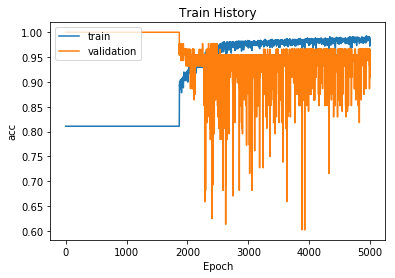

In [36]:
show_train_history(train_history,'acc','val_acc')

In [ ]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

In [ ]:
scores[1]

In [723]:
jack = [0,'male',25,'u','officer','v','S','F',0,0,0,0,0,0,0,1,1,1]

In [724]:
jack_df = pd.DataFrame([list(jack)],columns = ['suicide', 'sexuality', 'age', 'Education', 'rank', 'militaryservice', 'Time','testResult', 'suicideHistory', 'hadSuicideMessage', 'confirmedDisease','emotionalProblems', 'mentalillness', 'familySuicideHistory','familyMembers', 'workplacePressure', 'EconomicIssues','personalPressure'])

In [725]:
all_df = pd.concat([all_df,jack_df])

In [726]:
all_df[-1:]

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure
0,0,male,25,u,officer,v,S,F,0,0,0,0,0,0,0,1,1,1


In [727]:
all_Features,Label=PreprocessData(all_df)

/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [728]:
all_probability=model.predict(all_Features)

In [729]:
all_probability[:10]

array([[0.43230718],
       [0.2269934 ],
       [0.7660098 ],
       [0.5045022 ],
       [0.8838731 ],
       [0.50916034],
       [0.48148707],
       [0.42014727],
       [0.03168749],
       [0.86528254]], dtype=float32)

In [730]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

In [731]:
pd[-1:]

,suicide,sexuality,age,Education,rank,militaryservice,Time,testResult,suicideHistory,hadSuicideMessage,confirmedDisease,emotionalProblems,mentalillness,familySuicideHistory,familyMembers,workplacePressure,EconomicIssues,personalPressure,probability
0,0,2,25,4,4,2,3,19,0,0,0,0,0,0,0,1,1,1,0.021458


In [243]:
cols=['suicide', 'sexuality', 'age', 'Education', 'rank', 'militaryservice', 'Time','testResult', 'suicideHistory', 'hadSuicideMessage', 'confirmedDisease','emotionalProblems', 'mentalillness', 'familySuicideHistory','familyMembers', 'workplacePressure', 'EconomicIssues','personalPressure']
all_df=all_df[cols]